## Tutorial 6: Principal Component Analysis (PCA)

We compress a classic test image (mandrill.png), following the method discussed in tutorial.

**Exercise**: Find the minimum $k$ that retains at least 99% of the explained variance, and check that the recovered image looks good. How much space is saved?

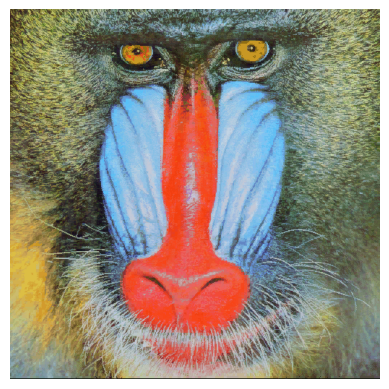

(512, 512, 3)


In [2]:
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
image_path = "./mandrill.png"

# read in image
img = imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

In [3]:
# convert image to 2d array by reshaping away the 3rd dimension
# Similar to the lecture,
# we treat each row as a feature, and each column as a sample
X = img.reshape(img.shape[0], -1)
print(X.shape)

(512, 1536)


In [4]:
# Perform SVD on the covariance matrix
U, s, VT = np.linalg.svd(np.cov(X, bias=True))
print("s shape:", s.shape)

s shape: (512,)


In [ ]:
def explained_variance(s, k):
    ''' returns the explained variance when we keep the first k cols '''
    return sum(s[:k]) / sum(s)

k = 9
var = explained_variance(s, k)
print("        k selected:", k)
print("explained variance:", var)

        k selected: 9
explained variance: 0.7458919168744933


In [ ]:
Ur = U[:,:k]
Z  = Ur.T @ X
print("Ur shape:", Ur.shape)
print(" Z shape:", Z.shape)

Ur shape: (512, 9)
 Z shape: (9, 1536)


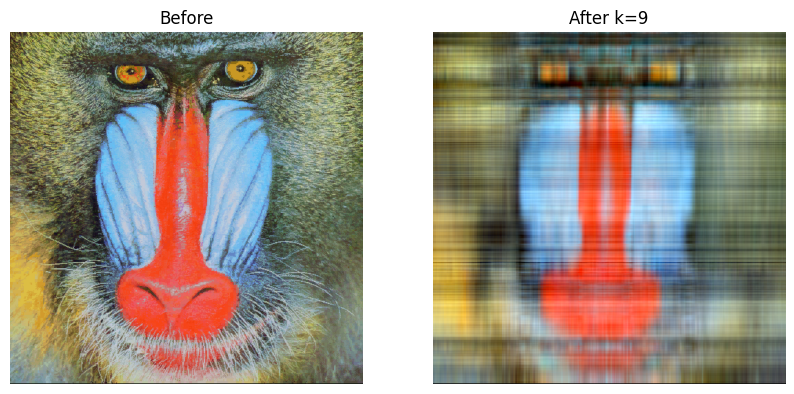

In [8]:
X_approx = Ur @ Z
# reset the original image dimensions
img_approx = X_approx.reshape(*img.shape)
# clip values in case approximation exceeds bounds
img_approx = np.clip(img_approx, 0, 1)

# plot side-by-side
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,2,1)
plt.imshow(img)
ax.set_title("Before")
ax.axis("off")

ax = fig.add_subplot(1,2,2)
plt.imshow(img_approx)
ax.set_title(f"After k={k}")
ax.axis("off")

plt.show()

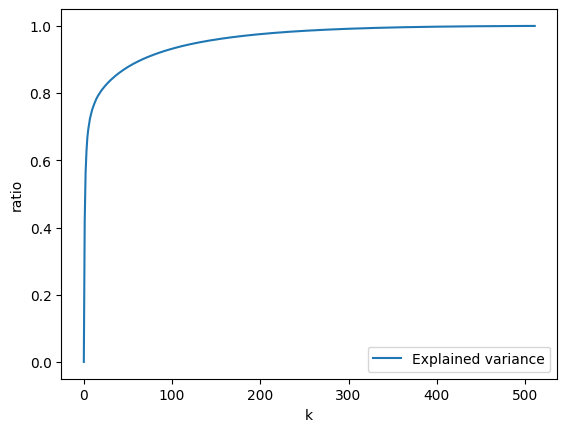

In [11]:
plt.plot(np.arange(512), [explained_variance(s, k) for k in range(512)], label='Explained variance')
plt.xlabel('k')
plt.ylabel('ratio')
plt.legend()